# Иллюстрация ядерно-обобщённой гребневой регрессии

##### Автор: Виктор Китов ([DeepMachineLearning.ru](https://deepmachinelearning.ru))

##### Лицензия: BSD-3-Clause

В этом ноутбуке рассмотрим зависимости прогнозов гребневой регрессии от типа ядер, гиперпараметров ядер и силы регуляризации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

In [2]:
FIG_SIZE = (15, 4)

SIGMA_NOISE = 0.2
SAMPLES_COUNT = 40
VIS_SAMPLES_COUNT = 200  # плотная сетка для визуализации
X_MAX = 2.5*np.pi

In [3]:
np.random.seed(1)
x = np.linspace(0, X_MAX, SAMPLES_COUNT)
y_true = x*np.sin(x)
eps = 2*x*np.random.normal(scale=SIGMA_NOISE, size=SAMPLES_COUNT)
y = y_true + eps

xx = np.linspace(0, X_MAX, VIS_SAMPLES_COUNT)  # мелкая сетка
yy_true = xx*np.sin(xx)

In [4]:
def plot_1d_dependencies_dense(
    x,             # исходные точки для scatter
    y,             # исходные значения для scatter
    xx,            # мелкая сетка для кривых
    yy_true,       # истинная функция на xx
    yy_pred_lst,   # список предсказаний на xx
    title_lst,
    axes_size=(1, 1),
    figsize=FIG_SIZE
):
    """
    Рисует scatter исходных данных и кривые по плотной сетке xx.
    """
    n_rows, n_cols = axes_size
    total_axes = n_rows * n_cols

    if len(yy_pred_lst) != len(title_lst):
        raise ValueError("Длины yy_pred_lst и title_lst должны совпадать.")
    if len(yy_pred_lst) > total_axes:
        raise ValueError("axes_size содержит меньше осей, чем требуется.")

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else np.array([axes])

    x_min, x_max = np.min(xx), np.max(xx)

    for i, (yy_pred, ttl) in enumerate(zip(yy_pred_lst, title_lst)):
        ax = axes_flat[i]

        ax.scatter(x, y, s=10, alpha=0.5, label="data")  # исходные точки
        ax.plot(xx, yy_true, linewidth=2, label="true")
        ax.plot(xx, yy_pred, linewidth=2, label="pred")

        ax.set_xlim(x_min, x_max)
        ax.set_title(ttl)
        ax.grid(True)
        ax.legend()

    # выключаем лишние оси
    for j in range(len(yy_pred_lst), total_axes):
        axes_flat[j].axis("off")

    plt.tight_layout()
    plt.show()

/home/apogentus/Anaconda/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/apogentus/Anaconda/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/home/apogentus/Anaconda/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


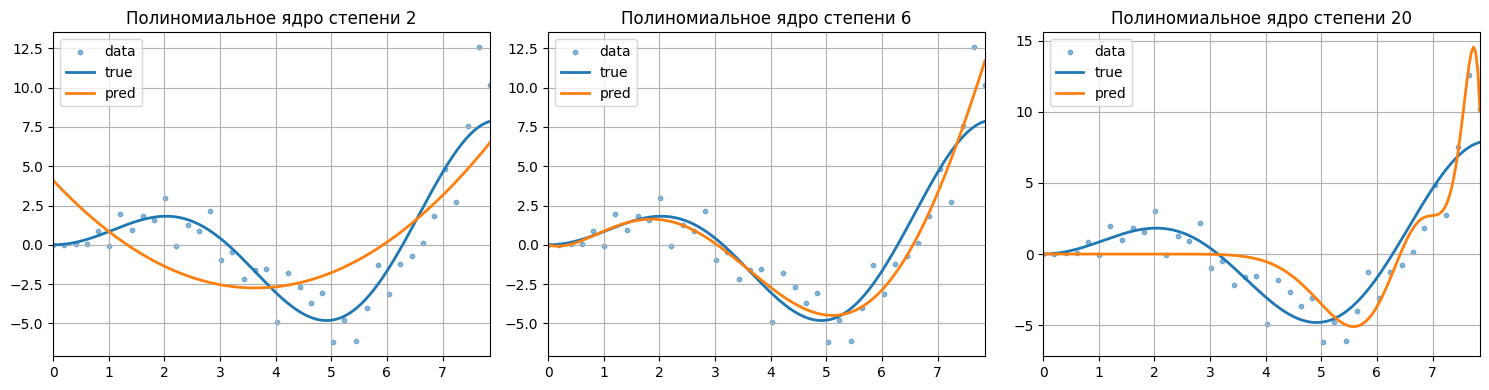

In [12]:
# Полиномиальные модели
degrees = [2, 6, 20]
models_poly = [KernelRidge(alpha=0.0, kernel="polynomial", degree=d, coef0=1) for d in degrees]
yy_preds_poly = [m.fit(x.reshape(-1,1), y).predict(xx.reshape(-1,1)) for m in models_poly]

plot_1d_dependencies_dense(
    x, y, xx, yy_true, yy_preds_poly,
    [f"Полиномиальное ядро степени {d}" for d in degrees],
    axes_size=(1, 3),
)

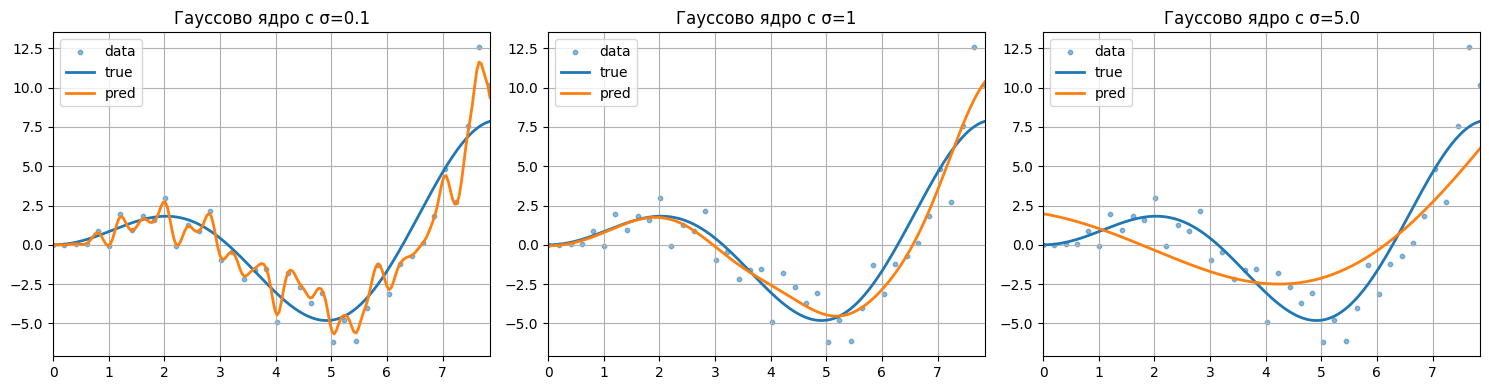

In [16]:
# RBF модели
sigmas = [0.1, 1, 5.0]
models_rbf = [KernelRidge(alpha=0.1, kernel="rbf", gamma=1/(2*s*s)) for s in sigmas]
yy_preds_rbf = [m.fit(x.reshape(-1,1), y).predict(xx.reshape(-1,1)) for m in models_rbf]

plot_1d_dependencies_dense(
    x, y, xx, yy_true, yy_preds_rbf,
    [f"Гауссово ядро с σ={s}" for s in sigmas],
    axes_size=(1, 3),
)

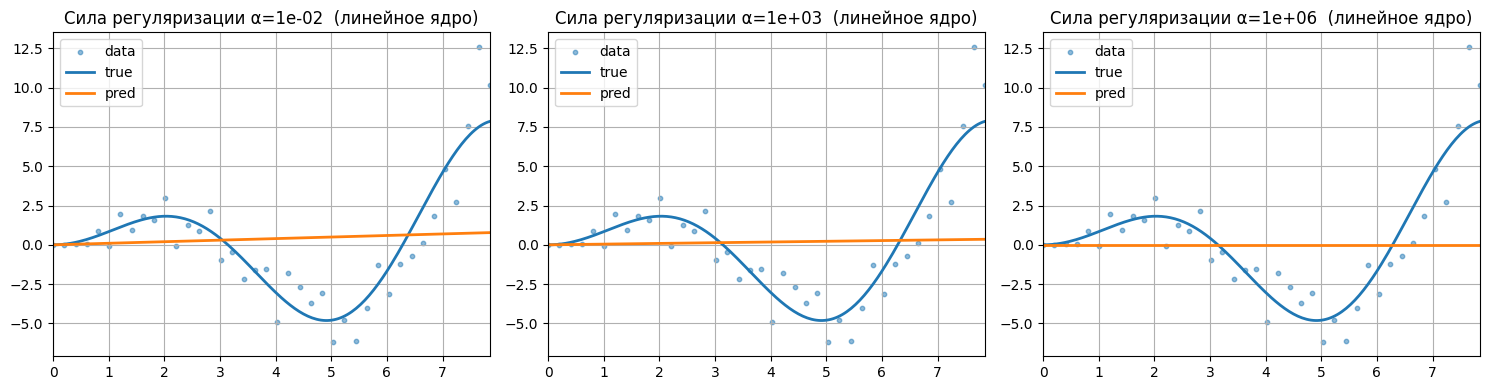

In [37]:
alphas = [0.01, 1000, 1000000]

# Линейное ядро
models_linear = [KernelRidge(alpha=a, kernel="linear") for a in alphas]
yy_preds_linear = [m.fit(x.reshape(-1,1), y).predict(xx.reshape(-1,1)) for m in models_linear]

plot_1d_dependencies_dense(
    x, y, xx, yy_true, yy_preds_linear,
    [f"Сила регуляризации α={a:.0e}  (линейное ядро)" for a in alphas],
    axes_size=(1, len(alphas)),
)

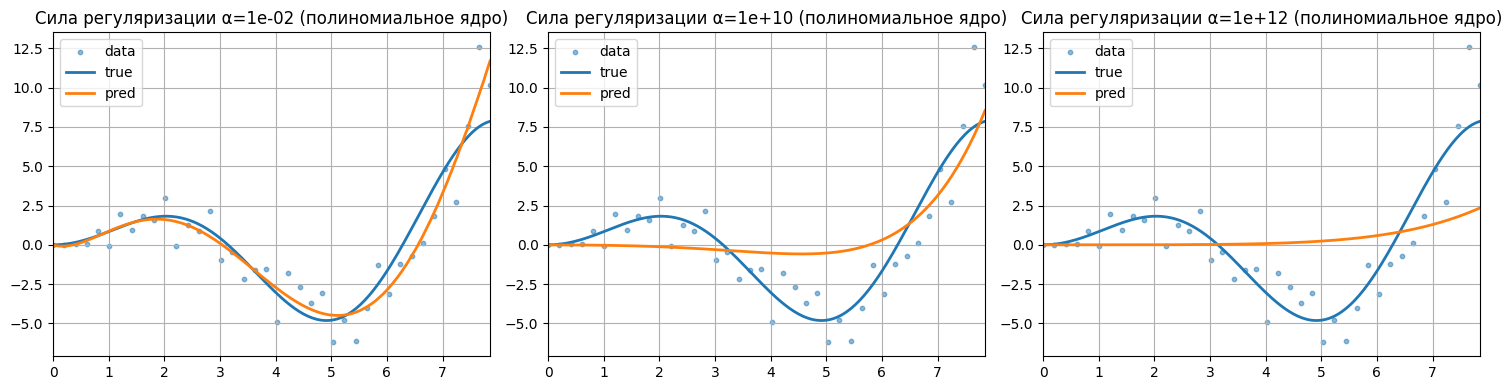

In [30]:
alphas = [0.01, 1e10, 1e12]

# Полиномиальное ядро degree=6
models_poly = [KernelRidge(alpha=a, kernel="polynomial", degree=6, coef0=10) for a in alphas]
yy_preds_poly = [m.fit(x.reshape(-1,1), y).predict(xx.reshape(-1,1)) for m in models_poly]

plot_1d_dependencies_dense(
    x, y, xx, yy_true, yy_preds_poly,
    [f"Сила регуляризации α={a:.0e} (полиномиальное ядро)" for a in alphas],
    axes_size=(1, len(alphas)),
)

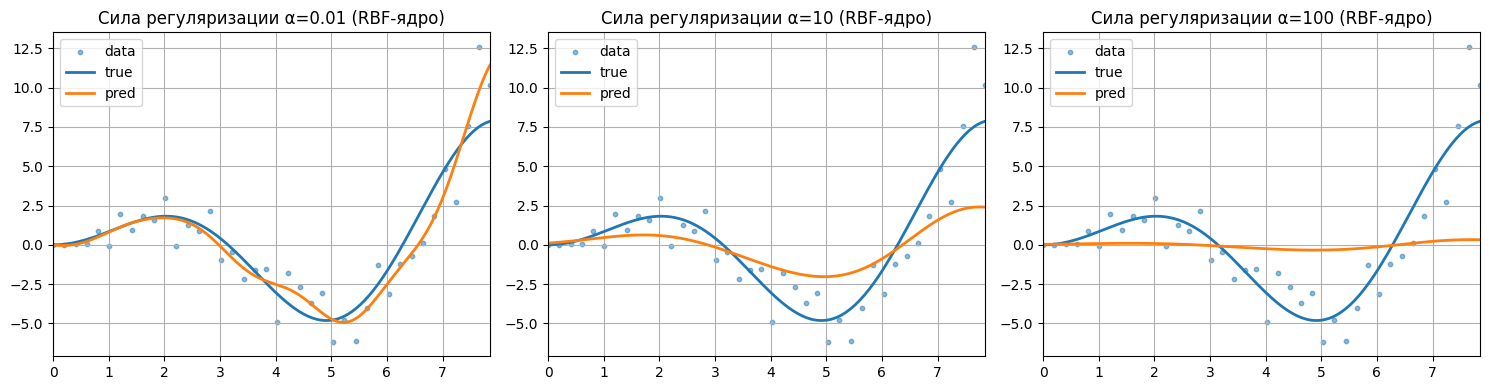

In [35]:
alphas = [0.01, 10, 100]

# RBF-ядро σ=1
gamma_rbf = 1/(2*1**2)
models_rbf = [KernelRidge(alpha=a, kernel="rbf", gamma=gamma_rbf) for a in alphas]
yy_preds_rbf = [m.fit(x.reshape(-1,1), y).predict(xx.reshape(-1,1)) for m in models_rbf]

plot_1d_dependencies_dense(
    x, y, xx, yy_true, yy_preds_rbf,
    [f"Сила регуляризации α={a} (RBF-ядро)" for a in alphas],
    axes_size=(1, len(alphas)),
)